# Unsupervised ML Using K-Means Clustering
## Devasya Mitra


**This is my second task as a Data Science and BI Intern at The Sparks Foundation.**
This notebook provides an insight about how to implement unsupervised ML using *K-Means clustering.* We have used the dataset **Iris** and used a set of packages to execute the same.

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn import datasets

### Importing the data set

In [2]:
iris_data=pd.read_csv("C:/Users/Mitra's/Downloads/Iris.csv")
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Finding the number of optimal clusters using 'elbow method'

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


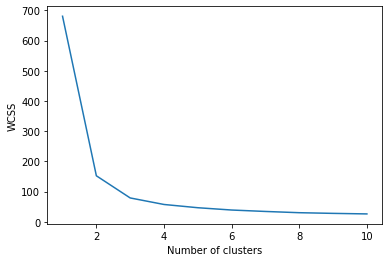

In [3]:
x = iris_data.iloc[:, [1, 2, 3, 4]].values
x

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)

plt.xlabel('Number of clusters')

# Within cluster sum of squares
plt.ylabel('WCSS') 
plt.show()

<b>Since the value of WCSS decreases slowly after 3 cluster, our optimal value of clusters would be 3.</b>

### Appying K-Means Clustering

In [4]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

### Visualizing the clusters

#### Comparing Petal Length with Petal Width

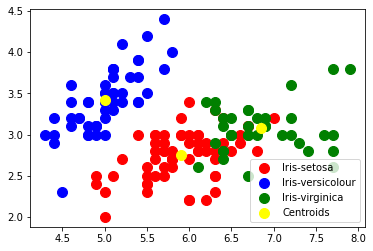

In [5]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend();

#### Comparing Sepal Length with Sepal Width

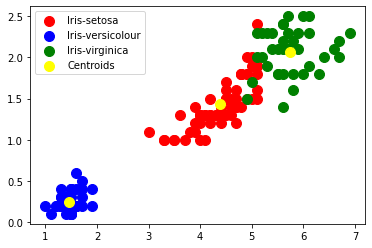

In [6]:
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend();

### Finding the centroids

In [7]:
kmeans.cluster_centers_[:,0]

array([5.9016129, 5.006    , 6.85     ])

In [8]:
kmeans.cluster_centers_[:,1]

array([2.7483871 , 3.418     , 3.07368421])

In [9]:
kmeans.cluster_centers_[:,2]

array([4.39354839, 1.464     , 5.74210526])

In [10]:
kmeans.cluster_centers_[:,3]

array([1.43387097, 0.244     , 2.07105263])